In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
import os
import math
import trieste
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


from true_pf.generate_true_pareto_fronts import read_true_pf
from experiment import run_experiment, get_hv_regret

## Simple 1d input case

In [4]:
search_space = trieste.space.Box([0], [2*math.pi])

def f1(x):
    return tf.cos(2 * x) + tf.sin(x)

def f2(x):
    return 0.2 * (tf.cos(x) - tf.sin(x)) + 0.3

def f(x):
    return tf.concat([f1(x), f2(x)], axis=-1)

In [16]:
num_initial_points = 3
num_query_points = 4
num_steps = 3
n_obj = 2

n_experiments = 10

In [18]:
from true_pf.generate_true_pareto_fronts import SIMPLE_1D_INPUT_FILENAME
true_pf = read_true_pf(os.path.join("true_pf", SIMPLE_1D_INPUT_FILENAME))

batch_mc_hv_regret = []
mo_lp_hv_regret = []
for _ in range(n_experiments):
    batch_mc_observations, mo_lp_observations = run_experiment(f,
                                                                n_obj,
                                                                search_space,
                                                                num_initial_points,
                                                                num_steps,
                                                                num_query_points)

    batch_mc_hv_regret.append(get_hv_regret(true_pf, batch_mc_observations, num_initial_points))
    mo_lp_hv_regret.append(get_hv_regret(true_pf, mo_lp_observations, num_initial_points))

Running Batch MC with batch size 4 for 3 iterations


2021-12-07 14:48:28.528279: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 14:48:32.504259: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 14:48:36.825669: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9


Optimization completed without errors
Batch MC finished in 13.436025381088257s
Running MO LP with batch size 4 for 3 iterations
Optimization completed without errors
MO LP finished in 19.178666830062866s
Running Batch MC with batch size 4 for 3 iterations


2021-12-07 14:49:00.747093: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 14:49:04.647291: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 14:49:09.179977: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9


Optimization completed without errors
Batch MC finished in 13.227159976959229s
Running MO LP with batch size 4 for 3 iterations
Optimization completed without errors
MO LP finished in 18.998299837112427s
Running Batch MC with batch size 4 for 3 iterations


2021-12-07 14:49:32.996878: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 14:49:36.643518: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 14:49:40.915784: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9


Optimization completed without errors
Batch MC finished in 11.882292985916138s
Running MO LP with batch size 4 for 3 iterations
Optimization completed without errors
MO LP finished in 18.908879280090332s
Running Batch MC with batch size 4 for 3 iterations


2021-12-07 14:50:04.693381: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 14:50:08.199096: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 14:50:12.092299: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9


Optimization completed without errors
Batch MC finished in 11.870822668075562s
Running MO LP with batch size 4 for 3 iterations
Optimization completed without errors
MO LP finished in 18.91974902153015s
Running Batch MC with batch size 4 for 3 iterations


2021-12-07 14:50:35.766280: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 14:50:39.223400: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 14:50:42.859795: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9


Optimization completed without errors
Batch MC finished in 11.504424571990967s
Running MO LP with batch size 4 for 3 iterations
Optimization completed without errors
MO LP finished in 18.618830680847168s
Running Batch MC with batch size 4 for 3 iterations


2021-12-07 14:51:06.286620: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 14:51:09.773836: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 14:51:13.829114: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9


Optimization completed without errors
Batch MC finished in 11.961633920669556s
Running MO LP with batch size 4 for 3 iterations
Optimization completed without errors
MO LP finished in 18.935208320617676s
Running Batch MC with batch size 4 for 3 iterations


2021-12-07 14:51:37.547241: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 14:51:41.278059: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 14:51:45.573130: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9


Optimization completed without errors
Batch MC finished in 12.452701807022095s
Running MO LP with batch size 4 for 3 iterations
Optimization completed without errors
MO LP finished in 18.83633518218994s
Running Batch MC with batch size 4 for 3 iterations


2021-12-07 14:52:09.356330: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 14:52:13.167934: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 14:52:17.087722: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9


Optimization completed without errors
Batch MC finished in 12.294238090515137s
Running MO LP with batch size 4 for 3 iterations
Optimization completed without errors
MO LP finished in 18.835248470306396s
Running Batch MC with batch size 4 for 3 iterations


2021-12-07 14:52:40.882895: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 14:52:45.426270: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 14:52:50.509003: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9


Optimization completed without errors
Batch MC finished in 14.554556846618652s
Running MO LP with batch size 4 for 3 iterations
Optimization completed without errors
MO LP finished in 25.70821714401245s
Running Batch MC with batch size 4 for 3 iterations


2021-12-07 14:53:22.062256: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 14:53:28.051194: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 14:53:34.697798: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9


Optimization completed without errors
Batch MC finished in 18.30903458595276s
Running MO LP with batch size 4 for 3 iterations
Optimization completed without errors
MO LP finished in 24.73646855354309s


In [19]:
batch_mc_hv_regret = np.array(batch_mc_hv_regret)
mo_lp_hv_regret = np.array(mo_lp_hv_regret)

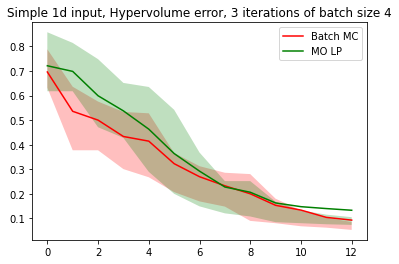

In [23]:
x = range(num_steps * num_query_points + 1)

plt.fill_between(x, np.quantile(batch_mc_hv_regret, q=0.25, axis=0), np.quantile(batch_mc_hv_regret, q=0.75, axis=0), facecolor='r', alpha=0.25)
plt.fill_between(x, np.quantile(mo_lp_hv_regret, q=0.25, axis=0), np.quantile(mo_lp_hv_regret, q=0.75, axis=0), facecolor='g', alpha=0.25)
plt.plot(x, np.mean(batch_mc_hv_regret, axis=0), c='r', label='Batch MC')
plt.plot(x, np.mean(mo_lp_hv_regret, axis=0), c='g', label='MO LP')
plt.title(f"Simple 1d input, Hypervolume error, {num_steps} iterations of batch size {num_query_points}")
plt.legend()
plt.show()

## 2d input functions from Gardner et al. 2014

In [24]:
search_space = trieste.space.Box([0, 0], [2*math.pi, 2*math.pi])

def f1(input_data):
    x, y = input_data[..., -2], input_data[..., -1]
    z = tf.cos(2.0 * x) * tf.cos(y) + tf.sin(x)
    return z[:, None]

def f2(input_data):
    x, y = input_data[:, -2], input_data[:, -1]
    # changes are made so that the function is between 0 and 1
    z = 1.0 - (tf.cos(x) * tf.cos(y) - tf.sin(x) * tf.sin(y) + 1.0) / 2.0
    return z[:, None]

def f(x):
    return tf.concat([f1(x), f2(x)], axis=-1)

In [25]:
num_initial_points = 3
num_query_points = 4
num_steps = 5
n_obj = 2

n_experiments = 10

In [26]:
from true_pf.generate_true_pareto_fronts import GARDNER_2D_INPUT_FILENAME
true_pf = read_true_pf(os.path.join("true_pf", GARDNER_2D_INPUT_FILENAME))

batch_mc_hv_regret = []
mo_lp_hv_regret = []
for _ in range(n_experiments):
    batch_mc_observations, mo_lp_observations = run_experiment(f,
                                                                n_obj,
                                                                search_space,
                                                                num_initial_points,
                                                                num_steps,
                                                                num_query_points)

    batch_mc_hv_regret.append(get_hv_regret(true_pf, batch_mc_observations, num_initial_points))
    mo_lp_hv_regret.append(get_hv_regret(true_pf, mo_lp_observations, num_initial_points))

Running Batch MC with batch size 4 for 5 iterations


2021-12-07 15:26:37.433905: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:26:42.730334: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:26:48.717076: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:26:53.029898: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:26:57.986006: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_gr

Optimization completed without errors
Batch MC finished in 25.950942039489746s
Running MO LP with batch size 4 for 5 iterations
Optimization completed without errors
MO LP finished in 29.904850006103516s
Running Batch MC with batch size 4 for 5 iterations


2021-12-07 15:27:32.967659: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:27:36.421995: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:27:40.546156: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:27:45.175771: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:27:49.713198: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_gr

Optimization completed without errors
Batch MC finished in 20.992522716522217s
Running MO LP with batch size 4 for 5 iterations
Optimization completed without errors
MO LP finished in 27.54644274711609s
Running Batch MC with batch size 4 for 5 iterations


2021-12-07 15:28:21.665946: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:28:25.989675: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:28:30.819968: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:28:35.763870: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:28:40.251335: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_gr

Optimization completed without errors
Batch MC finished in 22.41537117958069s
Running MO LP with batch size 4 for 5 iterations
Optimization completed without errors
MO LP finished in 28.251094102859497s
Running Batch MC with batch size 4 for 5 iterations


2021-12-07 15:29:13.840421: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:29:17.405876: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:29:21.433430: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:29:25.835163: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:29:30.808088: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_gr

Optimization completed without errors
Batch MC finished in 21.85138463973999s
Running MO LP with batch size 4 for 5 iterations
Optimization completed without errors
MO LP finished in 27.968389749526978s
Running Batch MC with batch size 4 for 5 iterations


2021-12-07 15:30:03.092593: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:30:06.403115: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:30:10.787812: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:30:16.147441: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:30:21.759448: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_gr

Optimization completed without errors
Batch MC finished in 22.545790672302246s
Running MO LP with batch size 4 for 5 iterations
Optimization completed without errors
MO LP finished in 27.45025372505188s
Running Batch MC with batch size 4 for 5 iterations


2021-12-07 15:30:54.168813: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:31:00.052641: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:31:03.995868: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:31:07.843720: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:31:12.460582: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_gr

Optimization completed without errors
Batch MC finished in 22.750404834747314s
Running MO LP with batch size 4 for 5 iterations
Optimization completed without errors
MO LP finished in 29.627190589904785s
Running Batch MC with batch size 4 for 5 iterations


2021-12-07 15:31:48.018495: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:31:52.730251: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:31:56.716556: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:32:00.966381: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:32:06.163467: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_gr

Optimization completed without errors
Batch MC finished in 23.992653608322144s
Running MO LP with batch size 4 for 5 iterations
Optimization completed without errors
MO LP finished in 28.365134954452515s
Running Batch MC with batch size 4 for 5 iterations


2021-12-07 15:32:39.752023: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:32:42.915671: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:32:46.677471: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:32:51.124284: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:32:55.214015: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_gr

Optimization completed without errors
Batch MC finished in 19.684759378433228s
Running MO LP with batch size 4 for 5 iterations
Optimization completed without errors
MO LP finished in 27.98803997039795s
Running Batch MC with batch size 4 for 5 iterations


2021-12-07 15:33:27.742129: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:33:31.489492: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:33:36.185851: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:33:40.485401: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:33:45.280115: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_gr

Optimization completed without errors
Batch MC finished in 21.327429056167603s
Running MO LP with batch size 4 for 5 iterations
Optimization completed without errors
MO LP finished in 28.66587519645691s
Running Batch MC with batch size 4 for 5 iterations


2021-12-07 15:34:18.926345: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:34:23.412318: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:34:27.004301: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:34:30.872139: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_greater_equal/Assert/AssertGuard/branch_executed/_9
2021-12-07 15:34:35.701104: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: assert_gr

Optimization completed without errors
Batch MC finished in 21.319744348526s
Running MO LP with batch size 4 for 5 iterations
Optimization completed without errors
MO LP finished in 27.889448881149292s


In [27]:
batch_mc_hv_regret = np.array(batch_mc_hv_regret)
mo_lp_hv_regret = np.array(mo_lp_hv_regret)

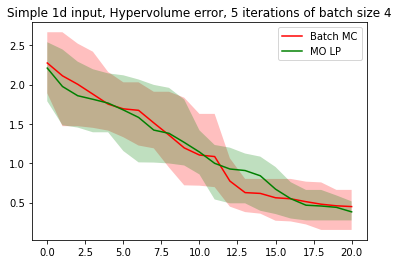

In [28]:
x = range(num_steps * num_query_points + 1)

plt.fill_between(x, np.quantile(batch_mc_hv_regret, q=0.25, axis=0), np.quantile(batch_mc_hv_regret, q=0.75, axis=0), facecolor='r', alpha=0.25)
plt.fill_between(x, np.quantile(mo_lp_hv_regret, q=0.25, axis=0), np.quantile(mo_lp_hv_regret, q=0.75, axis=0), facecolor='g', alpha=0.25)
plt.plot(x, np.mean(batch_mc_hv_regret, axis=0), c='r', label='Batch MC')
plt.plot(x, np.mean(mo_lp_hv_regret, axis=0), c='g', label='MO LP')
plt.title(f"Simple 1d input, Hypervolume error, {num_steps} iterations of batch size {num_query_points}")
plt.legend()
plt.show()